## Data manipulation with Pandas

#### Viewing data

In [2]:
## https://pandas.pydata.org/

import pandas as pd
import numpy as np

In [45]:
dates = pd.date_range("20130101", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD")) # Create a dataframe

In [46]:
df

,A,B,C,D
2013-01-01,0.167907,-1.498833,0.972366,-1.374921
2013-01-02,-0.360289,0.269211,1.567502,-0.517788
2013-01-03,1.023834,1.444119,-0.649933,0.834424
2013-01-04,0.438475,0.790262,2.443606,1.796077
2013-01-05,-0.642956,-0.003621,0.606623,-0.348645
2013-01-06,1.275841,0.310626,0.202771,0.687557


In [47]:
df.head() # show top 5 rows

,A,B,C,D
2013-01-01,0.167907,-1.498833,0.972366,-1.374921
2013-01-02,-0.360289,0.269211,1.567502,-0.517788
2013-01-03,1.023834,1.444119,-0.649933,0.834424
2013-01-04,0.438475,0.790262,2.443606,1.796077
2013-01-05,-0.642956,-0.003621,0.606623,-0.348645


In [48]:
df.tail(2) # show last 2 rows

,A,B,C,D
2013-01-05,-0.642956,-0.003621,0.606623,-0.348645
2013-01-06,1.275841,0.310626,0.202771,0.687557


In [49]:
df.to_numpy() # convert to numpy matrix

array([[ 0.16790684, -1.49883261,  0.97236593, -1.37492115],
       [-0.36028869,  0.26921116,  1.56750245, -0.51778848],
       [ 1.0238336 ,  1.44411915, -0.64993342,  0.83442431],
       [ 0.43847547,  0.79026161,  2.44360582,  1.79607658],
       [-0.64295594, -0.00362136,  0.60662324, -0.34864466],
       [ 1.27584124,  0.31062579,  0.20277129,  0.68755693]])

In [50]:
df["A"] # Get a column

2013-01-01    0.167907
2013-01-02   -0.360289
2013-01-03    1.023834
2013-01-04    0.438475
2013-01-05   -0.642956
2013-01-06    1.275841
Freq: D, Name: A, dtype: float64

In [51]:
df.iloc[3] # select by position

A    0.438475
B    0.790262
C    2.443606
D    1.796077
Name: 2013-01-04 00:00:00, dtype: float64

In [52]:
df[df["A"] > 0] # Conditional selection

,A,B,C,D
2013-01-01,0.167907,-1.498833,0.972366,-1.374921
2013-01-03,1.023834,1.444119,-0.649933,0.834424
2013-01-04,0.438475,0.790262,2.443606,1.796077
2013-01-06,1.275841,0.310626,0.202771,0.687557


#### Grouping

In [53]:
df = pd.DataFrame(
   ....:     {
   ....:         "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
   ....:         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
   ....:         "C": np.random.randn(8),
   ....:         "D": np.random.randn(8),
   ....:     }
   ....: )

In [54]:
df

,A,B,C,D
0,foo,one,0.413388,0.671823
1,bar,one,-0.146946,0.013185
2,foo,two,-0.407300,1.863314
3,bar,three,-0.812815,0.139784
4,foo,two,-0.901086,-2.019023
5,bar,two,0.687267,1.112648
6,foo,one,0.277321,-0.633406
7,foo,three,0.053770,-0.088355


In [55]:
df.groupby("A").sum() # Add the conditional columns

,C,D
A,,
bar,-0.272494,1.265617
foo,-0.563907,-0.205647


#### Plotting

<AxesSubplot:>

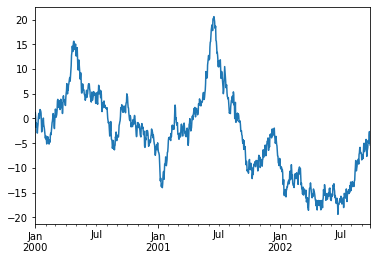

In [56]:
import matplotlib.pyplot as plt
plt.close("all")
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

#### Merge

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))

In [58]:
df

,0,1,2,3
0,0.397854,-0.952723,-0.065497,0.358242
1,-1.128127,0.616498,-0.018737,0.714973
2,-0.934920,0.170506,0.521846,-1.011132
3,1.962388,-0.525845,0.761408,-0.052581
4,-1.588741,-0.498221,1.311745,-1.432070
5,0.200908,-1.340690,0.877553,-1.389227
6,0.330328,0.296202,0.665544,0.647873
7,0.852157,-0.639021,-0.149094,-0.490757
8,-0.070625,-0.458344,-1.437000,1.302834
9,-0.023421,0.258343,-0.518585,0.060313


In [59]:
pieces = [df[:3], df[3:7], df[7:]]

In [60]:
pieces

[          0         1         2         3
 0  0.397854 -0.952723 -0.065497  0.358242
 1 -1.128127  0.616498 -0.018737  0.714973
 2 -0.934920  0.170506  0.521846 -1.011132,
           0         1         2         3
 3  1.962388 -0.525845  0.761408 -0.052581
 4 -1.588741 -0.498221  1.311745 -1.432070
 5  0.200908 -1.340690  0.877553 -1.389227
 6  0.330328  0.296202  0.665544  0.647873,
           0         1         2         3
 7  0.852157 -0.639021 -0.149094 -0.490757
 8 -0.070625 -0.458344 -1.437000  1.302834
 9 -0.023421  0.258343 -0.518585  0.060313]

In [61]:
pd.concat(pieces)

,0,1,2,3
0,0.397854,-0.952723,-0.065497,0.358242
1,-1.128127,0.616498,-0.018737,0.714973
2,-0.934920,0.170506,0.521846,-1.011132
3,1.962388,-0.525845,0.761408,-0.052581
4,-1.588741,-0.498221,1.311745,-1.432070
5,0.200908,-1.340690,0.877553,-1.389227
6,0.330328,0.296202,0.665544,0.647873
7,0.852157,-0.639021,-0.149094,-0.490757
8,-0.070625,-0.458344,-1.437000,1.302834
9,-0.023421,0.258343,-0.518585,0.060313


#### Sparse data structures

In [62]:
arr = np.random.randn(10)
arr[2:-2] = np.nan
ts = pd.Series(pd.arrays.SparseArray(arr))

In [63]:
ts

0   -0.131974
1   -0.682862
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8   -0.069441
9    0.341863
dtype: Sparse[float64, nan]

#### Categorical data

In [64]:
df = pd.DataFrame(
   .....:     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
   .....: )
   .....: 

In [65]:
df["grade"] = df["raw_grade"].astype("category")

In [66]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [67]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [68]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']